First, we will import all of our data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.odr as odr

In [2]:
# import data
f = [1.00, 1.30, 1.70, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25]
sigma_f = [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]
phi = [39.3, 50.8, 66.3, 79.1, 89.1, 99.4, 109, 119, 129]
sigma_phi = [2.0, 2.0, 2.5, 2.5, 2.4, 3.2, 4.1, 2.0, 5.5]


Then, plot all of this data with errors. $\sigma_f$ is very small, so it's not visible in the graph. 

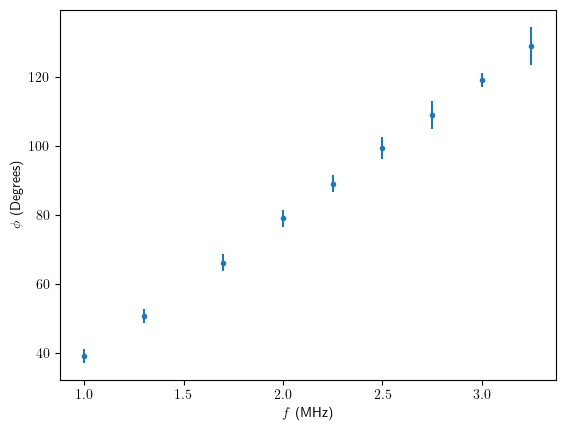

In [3]:
# make it all latex
plt.rcParams['text.usetex'] = True


plt.errorbar(x=f, y=phi, xerr=sigma_f, yerr=sigma_phi, fmt=".")
plt.xlabel("$f$ (MHz)")
plt.ylabel("$\phi$ (Degrees)")
plt.show()

Now, we will create a best fit plot taking into account the errrors in the data. We will use the `scipy.odr` library. 

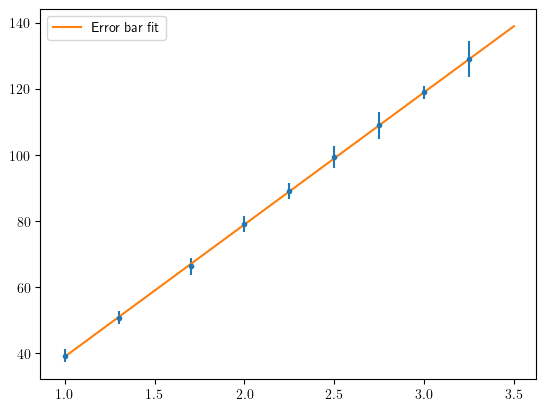

In [4]:
# Define the fit we would like to use 

def linearFit(beta, x): 
    return beta[0]*x+beta[1]

linear_model = odr.Model(linearFit)
data=odr.RealData(f, phi, sx=sigma_f, sy=sigma_phi)
odr_instance = odr.ODR(data, linear_model, beta0=[1, 1])  

output = odr_instance.run()

m_err, b_err = output.beta
m_err_sigma, b_err_sigma = output.sd_beta

x_data = np.linspace(1,3.5,100)
plt.errorbar(x=f, y=phi, xerr=sigma_f, yerr=sigma_phi, fmt=".")
plt.plot(x_data, linearFit( [m_err, b_err], x_data), label="Error bar fit")
plt.legend()
plt.show()

In [5]:
# Report slope and std. dev
print(m_err)
print(m_err_sigma)

40.02386740750402
0.15682535467591713


Now, we will do the same, but not using any of the errors in our calculation. 

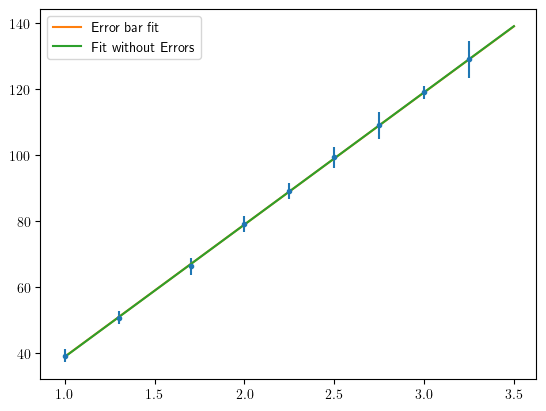

In [12]:
m, b = np.polyfit(x=f, y=phi, deg=1)

# Plot everything again

plt.errorbar(x=f, y=phi, xerr=sigma_f, yerr=sigma_phi, fmt=".")
plt.plot(x_data, linearFit( [m_err, b_err], x_data), label="Error bar fit")

plt.plot(x_data, linearFit([m,b], x_data), label="Fit without Errors")
plt.legend()
plt.show()


As we can see, there's almost no difference. We obtain slope of: 

In [13]:
print(m)

40.05879558142295


Now, we calculate the mean value of c and its std. dev. 

In [21]:
L=34.07
sigma_L = 0.03
s=m_err

c=L/s*2*np.pi*180/np.pi # Making sure to convert to radians as well 
sigma_c = np.sqrt(np.power((L/np.power(s,2)*2*np.pi*m_err_sigma),2)+np.power((2*np.pi/s*sigma_L),2))
print(c)
print(sigma_c)

306.44714752628863
0.021479714506692525


Obtained value of $306.44\times 10^6$ or $3.064(4\pm2)\times10^8\frac{m}{s}$. This is pretty close to the currently accepted value.